In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas  as pd
import numpy as np
%matplotlib inline

In [2]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
x.shape

(1000, 2)

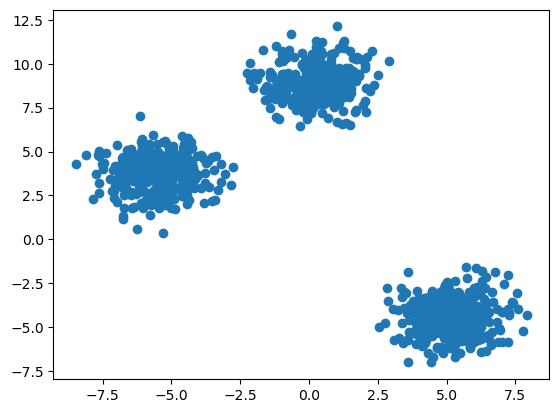

In [7]:
plt.scatter(x[:,0],x[:,1])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33, random_state=42)

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Manual process , Elbow method to select the K value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [11]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585605,
 1140.4677884655123,
 991.9047984051343,
 853.9700355690832,
 762.4885138694939,
 662.7565100887676,
 579.157499326634,
 533.1196377182407]

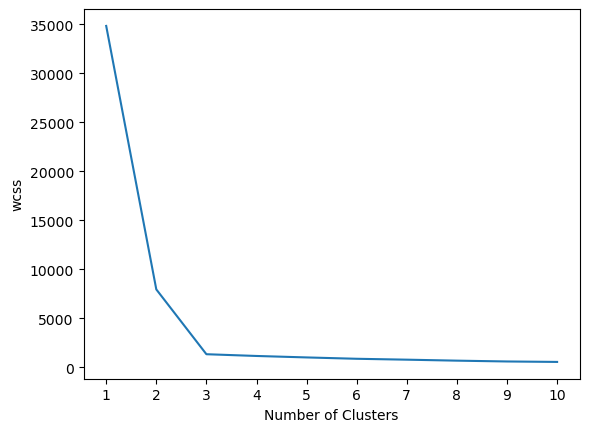

In [12]:
# elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [17]:
y_test_labels=kmeans.fit_predict(x_train)

C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


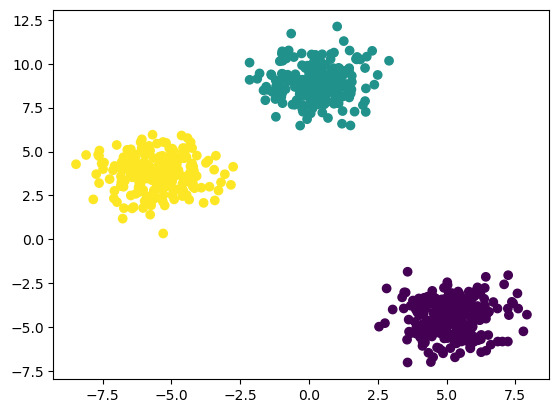

In [15]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [22]:
#  knee locator
!pip install kneed

In [25]:
from kneed import KneeLocator

In [27]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [33]:
# perfomance metrics , silhoutte score
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [35]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.3402819226843547,
 0.3488061330821241,
 0.34241567609837065,
 0.3448440631987711,
 0.34068293977062275]

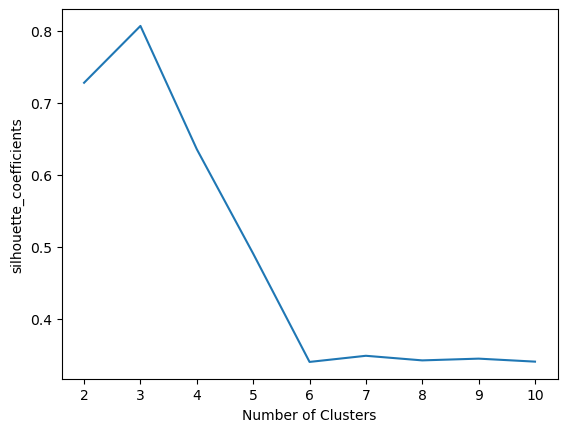

In [36]:
# plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()